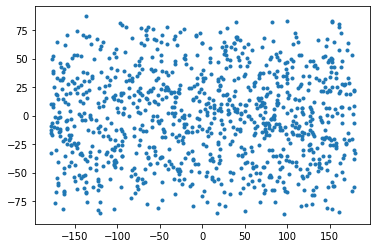

In [1]:
import matplotlib.pyplot as plt
from gprm import PointDistributionOnSphere

pts = PointDistributionOnSphere(distribution_type='marsaglia', N=1000)

plt.plot(pts.longitude,pts.latitude,'.')

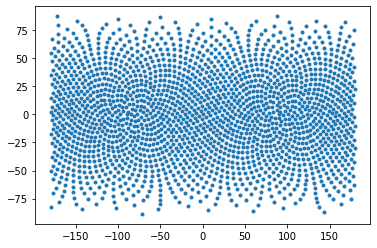

In [2]:
pts = PointDistributionOnSphere(distribution_type='fibonacci', N=2000)

plt.plot(pts.longitude,pts.latitude,'.')

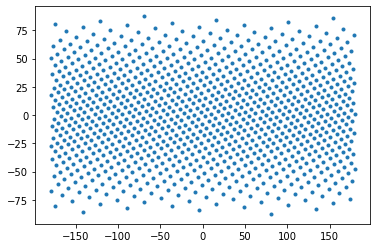

In [3]:
pts = PointDistributionOnSphere(distribution_type='spiral', N=1000)

plt.plot(pts.longitude,pts.latitude,'.')


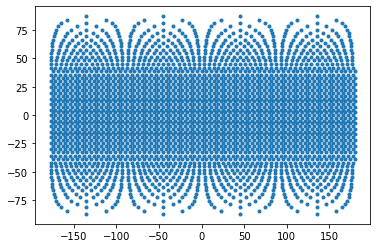

In [4]:
pts = PointDistributionOnSphere(distribution_type='healpix', N=16)

plt.plot(pts.longitude,pts.latitude,'.')

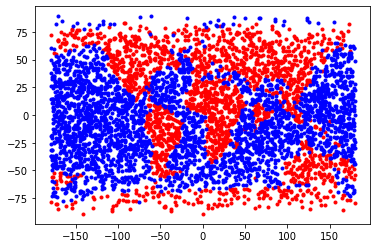

In [14]:
from gprm import ReconstructionModel
from gprm.utils.spatial import rasterise_polygons

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_continent_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/ContinentalPolygons/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz')


pts = PointDistributionOnSphere(distribution_type='marsaglia', N=5000)


pts_mask_continents = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 50., masking='outside')
pts_mask_oceans = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 50., masking='inside')

plt.plot(pts_mask_continents.to_lat_lon_array()[:,1], pts_mask_continents.to_lat_lon_array()[:,0], 'r.')
plt.plot(pts_mask_oceans.to_lat_lon_array()[:,1], pts_mask_oceans.to_lat_lon_array()[:,0], 'b.')



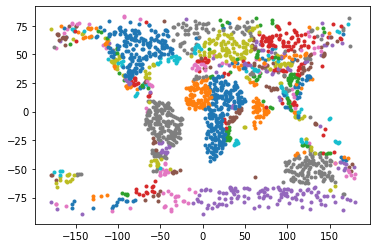

In [15]:
pts_mask = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 50., preserve_polygon_attributes=True)

for pts_group in pts_mask:
    plt.plot(pts_group.get_geometry().to_lat_lon_array()[:,1], pts_group.get_geometry().to_lat_lon_array()[:,0], '.')


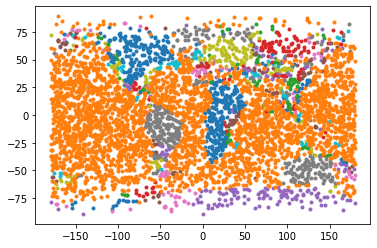

In [16]:
pts_mask = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 50., preserve_polygon_attributes=True, masking=None)

for pts_group in pts_mask:
    plt.plot(pts_group.get_geometry().to_lat_lon_array()[:,1], pts_group.get_geometry().to_lat_lon_array()[:,0], '.')
